# Proyecto Grupal: Análisis de circuito para Electromiografía

Avanzando un poco en el sentido que nos señalaron en los mails y en las ayudas que nos dieron hoy, pudimos llegar a lo siguiente:
Por un lado pudimos corregir la transferencia normalizada, la corroboramos con lp2lp para estar seguros de que lo que estabamos haciendo estuviera bien (algo de esto ya les habíamos comentado en persona). 
Por otro lado, corrimos simulaciones para ver las diferencias entre filtros Butterworth y Bessel del mismo orden del filtro que estamos analizando (orden 4), por último, gracias a un error de lectura pudimos ver que podemos mejorar el retardo de grupo.
A continuación les mostramos los detalles.




*El valor obtenido en el Bode en w=1.000 para un Butter-orden-4 es: -3.010dB

*El valor obtenido en el Bode en w=1.000 para un Bessel-orden-4 es: -3.010dB

*El valor obtenido en el Bode en w=1.000 para un Besselworth-orden-4 es: -3.523dB






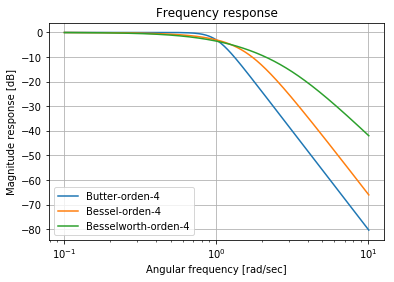

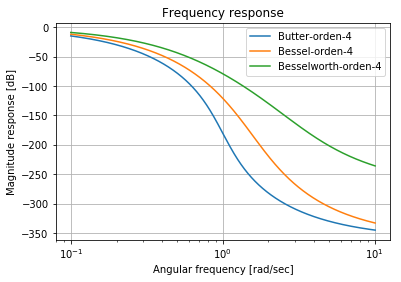

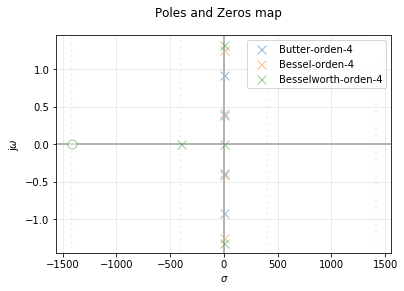

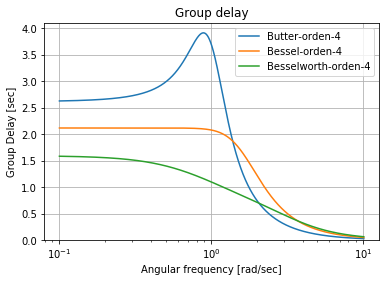

In [2]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 18:30:41 2018

@author: tiago
"""
import numpy as np
import scipy.signal as sig
#import matplotlib as mpl
from splane import analyze_sys


#vectores auxiliares para imprimir los graficos de los sistemas
all_sys = []
filter_names = []

# Constantes del filtro Besselworth
fc = 40

# Constatens del filtro Butterworth y Bessel
order2analyze = 4


#____________Butter____________

z,p,k = sig.buttap(order2analyze)

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Butter-orden-'+str(order2analyze))



#____________Bessel____________

z,p,k = sig.besselap(order2analyze, norm='mag')

num, den = sig.zpk2tf(z,p,k)

all_sys.append(sig.TransferFunction(num,den))

filter_names.append('Bessel-orden-'+str(order2analyze))



#____________Besselworth____________

#Coeficientes de la transferencia obtenida con Tina normalizada
num = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den = [(7.21*10**(-14))*((fc*2*np.pi)**4), (7.38*10**(-9))*((fc*2*np.pi)**3), 
       (1.14*10**(-5))*((fc*2*np.pi)**2), (6.33*10**(-3))*(fc*2*np.pi), 1]

tf = sig.TransferFunction(num, den)

all_sys.append(tf)
filter_names.append("Besselworth-orden-4")

#Defino el rango a imprimir y el punto a mostrar
ini = 0.1
end = 10.1
n = 100000
bode_lenght = np.linspace(ini, end, n)
printW = 1
#imprimo todos los Bode
analyze_sys( all_sys, filter_names, bode_lenght, printW=printW)


![esquematicoTinaError.png](esquematicoTina.png)
![BodeTinaError.png](BodeTina.png)

Como primer paso analizamos la transferencia para los filtros Butterworth, Bessel y Besselworth y obtuivimos el valor de atenuación en w=1. Se puede ver en los valores que nos da Python y en el bode del Tina, que en w=1 la atenuacion es aproximadamente 3.52dB y no 3dB para el Besselworth. Por esto creemos que no se basaron en la atenuación en w=1 para calcular la transferencia del filtro sino en el retardo de grupo en dicho punto.

Teniendo en cuenta esto último y gracias a un error en la lectura del plano, pudimos notar que cambiando el valor de C4 se puede mejorar la respuesta de retardo de grupo en detrimento de la atenuación en w=1.
En el próximo código les mostramos la comparación de do filtros Besselworth con C4=1uf y con C4=10nF

*Coeficientes de la transferencia Besselworth NORMALIZADA para C4=10nF:

	Numerador:
		245.500
		347620.433
	Denominador:
		1.000
		508.258
		43476.063
		215795.364
		347620.433


*Polos y ceros de la transferencia Besselworth NORMALIZADA para C4=10nF:

	Polos:
		-401.239+0.000j
		-101.843+0.000j
		-2.588+1.345j
		-2.588-1.345j
	Ceros:
		-1415.969
_______________________________________________________________________

*Coeficientes de la transferencia Besselworth NORMALIZADA para C4=1uF::

	Numerador:
		2.455
		3476.204
	Denominador:
		1.000
		407.269
		2503.167
		5530.302
		3476.204


*Polos y ceros de la transferencia Besselworth NORMALIZADA para C4=1uF::

	Polos:
		-401.062+0.000j
		-2.591+1.320j
		-2.591-1.320j
		-1.025+0.000j
	Ceros:
		-1415.969



*El valor obtenido en el Bode en w=1.000 para un Besselworth-orden-4-C4=10nF es: -0.603dB

*El valor obtenido en el Bode en w=1.000 para un Besselworth-orden-4-C4=1uF es: -3.523dB






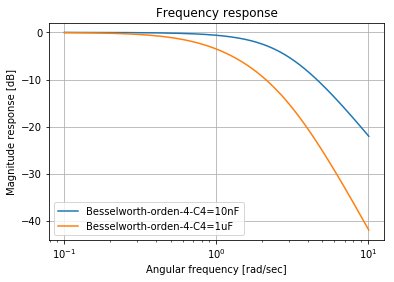

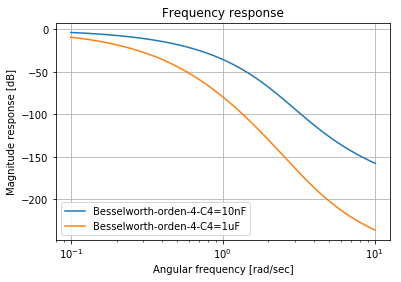

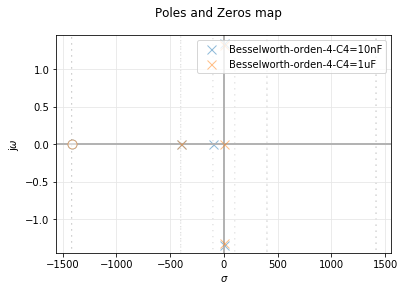

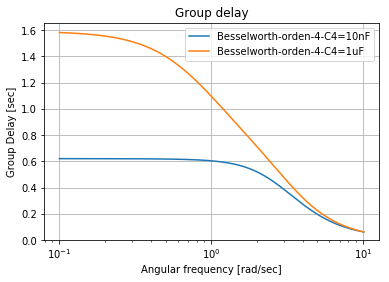

In [3]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 18:30:41 2018

@author: tiago
"""
import numpy as np
import scipy.signal as sig
#import matplotlib as mpl
from splane import analyze_sys


#vectores auxiliares para imprimir los graficos de los sistemas
all_sys = []
filter_names = []

# Constantes del filtro Besselworth
fc = 40

# Constatens del filtro Butterworth y Bessel
order2analyze = 4


#____________Besselworth____________

#Coeficientes de la transferencia obtenida con Tina normalizada con C4 = 10nf
num = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den = [(7.21*10**(-16))*((fc*2*np.pi)**4), (9.21*10**(-11))*((fc*2*np.pi)**3),
       (1.98*10**(-6))*((fc*2*np.pi)**2), (2.47*10**(-3))*(fc*2*np.pi), 1]

#Coeficientes de la transferencia obtenida con Tina normalizada
num2 = [(2.81*10**(-6))*(fc*2*np.pi), 1]
den2 = [(7.21*10**(-14))*((fc*2*np.pi)**4), (7.38*10**(-9))*((fc*2*np.pi)**3), 
       (1.14*10**(-5))*((fc*2*np.pi)**2), (6.33*10**(-3))*(fc*2*np.pi), 1]

tf = sig.TransferFunction(num, den)
tf2 = sig.TransferFunction(num2, den2)

print ("*Coeficientes de la transferencia Besselworth NORMALIZADA para C4=10nF:\n")
print ("\tNumerador:")
for c in tf.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia Besselworth NORMALIZADA para C4=10nF:\n")
print ("\tPolos:")
for c in tf.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf.zeros:
    print(f"\t\t{c:.3f}")
    
print("_______________________________________________________________________")
    
print ("\n*Coeficientes de la transferencia Besselworth NORMALIZADA para C4=1uF::\n")
print ("\tNumerador:")
for c in tf2.num:
    print(f"\t\t{c:.3f}")
print ("\tDenominador:")
for c in tf2.den:
    print(f"\t\t{c:.3f}")
print ("\n")

print ("*Polos y ceros de la transferencia Besselworth NORMALIZADA para C4=1uF::\n")
print ("\tPolos:")
for c in tf2.poles:
    print(f"\t\t{c:.3f}")
print ("\tCeros:")
for c in tf2.zeros:
    print(f"\t\t{c:.3f}")


all_sys.append(tf)
filter_names.append("Besselworth-orden-4-C4=10nF")
all_sys.append(tf2)
filter_names.append("Besselworth-orden-4-C4=1uF")

#Defino el rango a imprimir y el punto a mostrar
ini = 0.1
end = 10.1
n = 100000
bode_lenght = np.linspace(ini, end, n)
printW = 1
#imprimo todos los Bode
analyze_sys( all_sys, filter_names, bode_lenght, printW=printW)

![esquematicoTinaError.png](esquematicoTinaError.png)
![BodeTinaError.png](BodeTinaError.png)

Como se puede ver, el retardo de grupo mejora considerablemente cambiando el valor del capacitor C4 pero empeora también considerablemente la atenuación en w=1 (de 3.52dB a 0.60dB).
También se puede ver que, si bien todos los polos cambian su ubicación, el que mas se modifica es el que está sobre el eje sigma que pasa de -1.025 a -101.843 alejándose del eje jw y provocando así el menor valor de atenuación en el Bode.